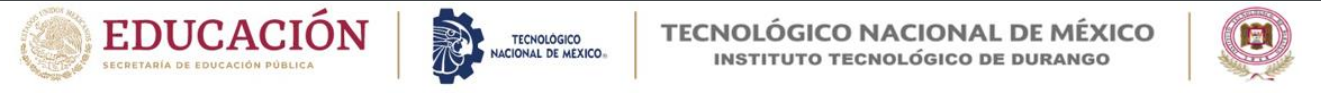
## Asignatura: Ciencia de los datos en las organizaciones 
## Unidad 2
#### Nombre del alumno: Alan Joseph Perez Soto
#### Practica Final: Regresion Lineal

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [10]:
propiedades= pd.read_csv("Datos_Propiedades.csv", encoding= "ISO-8859-1")
propiedades.head()

,ï»¿Estado,RegiÃ³n,l3,habitaciones,dormitorios,baÃ±os,superficeTerreno,superficieConstruido,Precio,tipoPropiedad
0,Durango,Zona Norte,Pilar,1,1,1.0,50.0,35.0,450000,Departamento
1,Durango,Zona Norte,Pilar,1,1,1.0,32.0,32.0,350000,Departamento
2,Durango,Zona Norte,Tigre,2,1,2.0,99.0,84.0,2150000,Departamento
3,Durango,Zona Norte,Tigre,2,1,1.0,50.0,50.0,1090000,Departamento
4,Durango,Zona Norte,Tigre,2,1,1.0,53.0,42.0,1450000,Departamento


In [11]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ï»¿Estado             146660 non-null  object 
 1   RegiÃ³n               146660 non-null  object 
 2   l3                    146660 non-null  object 
 3   habitaciones          146660 non-null  int64  
 4   dormitorios           146660 non-null  int64  
 5   baÃ±os                140703 non-null  float64
 6   superficeTerreno      126133 non-null  float64
 7   superficieConstruido  125046 non-null  float64
 8    Precio               146660 non-null  int64  
 9   tipoPropiedad         146660 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 11.2+ MB


In [12]:
propiedades["baÃ±os"].isnull().value_counts()

False    140703
True       5957
Name: baÃ±os, dtype: int64

In [14]:
#Calcular la media
promedio_baño = propiedades["baÃ±os"].astype("float").mean(axis=0)
print(promedio_baño)

1.599994314264799


In [16]:
#operacion de reemplazo
propiedades["baÃ±os"].replace(np.nan, promedio_baño, inplace=True)
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ï»¿Estado             146660 non-null  object 
 1   RegiÃ³n               146660 non-null  object 
 2   l3                    146660 non-null  object 
 3   habitaciones          146660 non-null  int64  
 4   dormitorios           146660 non-null  int64  
 5   baÃ±os                146660 non-null  float64
 6   superficeTerreno      126133 non-null  float64
 7   superficieConstruido  125046 non-null  float64
 8    Precio               146660 non-null  int64  
 9   tipoPropiedad         146660 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 11.2+ MB


In [19]:
promedio_supT=propiedades["superficeTerreno"].astype("float").mean(axis=0)
print(promedio_supT)

216.872888141882


In [20]:
#reemplazar los valores nulos en la columna "superficieTerreno" del DataFrame propiedades
propiedades["superficeTerreno"].replace(np.nan, promedio_supT, inplace=True)
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ï»¿Estado             146660 non-null  object 
 1   RegiÃ³n               146660 non-null  object 
 2   l3                    146660 non-null  object 
 3   habitaciones          146660 non-null  int64  
 4   dormitorios           146660 non-null  int64  
 5   baÃ±os                146660 non-null  float64
 6   superficeTerreno      146660 non-null  float64
 7   superficieConstruido  125046 non-null  float64
 8    Precio               146660 non-null  int64  
 9   tipoPropiedad         146660 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 11.2+ MB


In [21]:
promedio_supC=propiedades["superficieConstruido"].astype("float").mean(axis=0)
print(promedio_supC)

112.81801097196232


In [22]:
#reemplazar los valores nulos en la columna "superficieConstruido" del DataFrame propiedades con 
#el promedio de los valores no nulos en esa columna, y luego imprime información sobre el DataFrame actualizado.
propiedades["superficieConstruido"].replace(np.nan, promedio_supC, inplace=True)
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ï»¿Estado             146660 non-null  object 
 1   RegiÃ³n               146660 non-null  object 
 2   l3                    146660 non-null  object 
 3   habitaciones          146660 non-null  int64  
 4   dormitorios           146660 non-null  int64  
 5   baÃ±os                146660 non-null  float64
 6   superficeTerreno      146660 non-null  float64
 7   superficieConstruido  146660 non-null  float64
 8    Precio               146660 non-null  int64  
 9   tipoPropiedad         146660 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 11.2+ MB


In [23]:
#calcular la correlación
propiedades.corr(numeric_only=True)

,habitaciones,dormitorios,baÃ±os,superficeTerreno,superficieConstruido,Precio
habitaciones,1.000000,0.869769,0.594409,0.074398,0.068210,0.351025
dormitorios,0.869769,1.000000,0.566632,0.069626,0.063289,0.316192
baÃ±os,0.594409,0.566632,1.000000,0.055884,0.062373,0.496166
superficeTerreno,0.074398,0.069626,0.055884,1.000000,0.314654,0.033663
superficieConstruido,0.068210,0.063289,0.062373,0.314654,1.000000,0.042506
Precio,0.351025,0.316192,0.496166,0.033663,0.042506,1.000000


<Axes: xlabel='baÃ±os', ylabel=' Precio '>

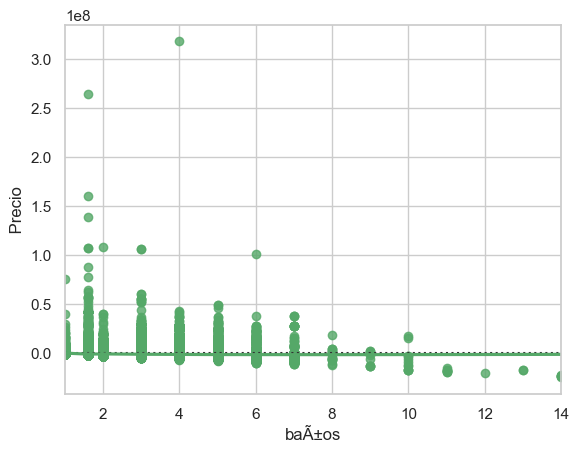

In [24]:
#residuos en función del número de baños, con una línea de suavizado local que indica la tendencia general de los residuos
sns.set_theme(style='whitegrid')
sns.residplot(x="baÃ±os", y=" Precio ", data=propiedades, lowess=True, color="g")

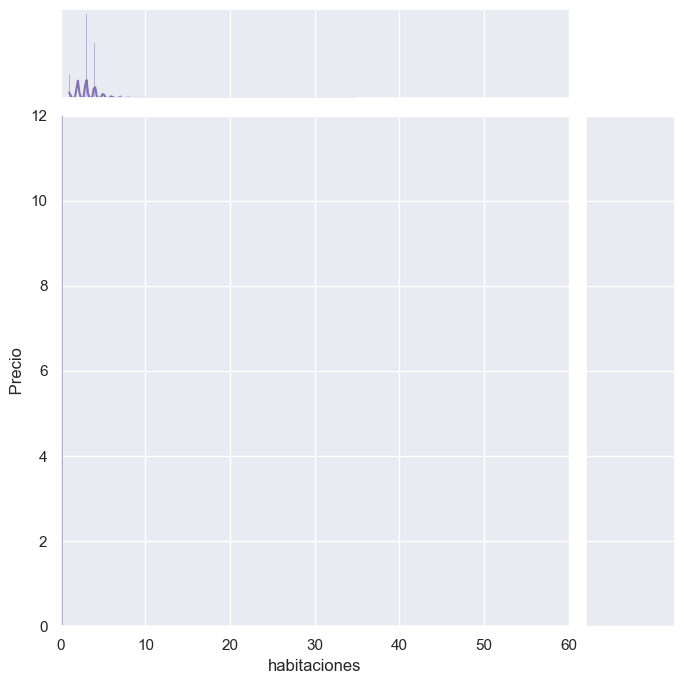

In [25]:
# relación entre el número de habitaciones y el precio de las propiedades, con una línea de regresión lineal ajustada.
sns.set_theme(style="darkgrid")
g= sns.jointplot(x= "habitaciones", y=" Precio ", data=propiedades,
                kind="reg", truncate=False,
                xlim=(0, 60), ylim=(0,12),
                color="m", height=7)

<Axes: xlabel='dormitorios', ylabel=' Precio '>

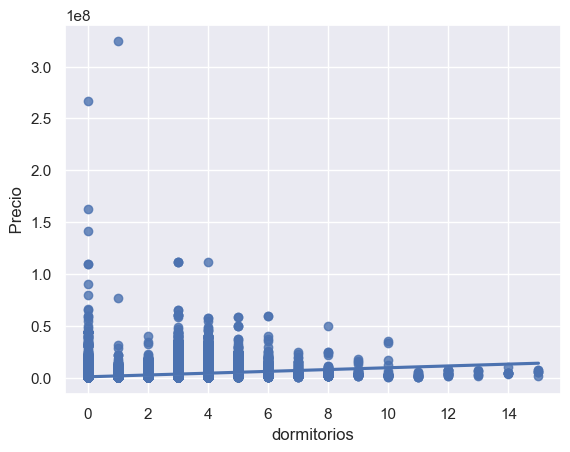

In [26]:
#El gráfico resultante, la relación entre el número de dormitorios y el precio de las propiedades, con una línea de regresión lineal ajustada
sns.regplot(x="dormitorios", y=" Precio ", data=propiedades)

In [27]:
propiedades.to_csv("Datos_Propiedades2.csv",index=True)


In [30]:
propiedades_2= pd.read_csv("Datos_Propiedades2.csv")
propiedades_2.head()

,Unnamed: 0,ï»¿Estado,RegiÃ³n,l3,habitaciones,dormitorios,baÃ±os,superficeTerreno,superficieConstruido,Precio,tipoPropiedad
0,0,Durango,Zona Norte,Pilar,1,1,1.0,50.0,35.0,450000,Departamento
1,1,Durango,Zona Norte,Pilar,1,1,1.0,32.0,32.0,350000,Departamento
2,2,Durango,Zona Norte,Tigre,2,1,2.0,99.0,84.0,2150000,Departamento
3,3,Durango,Zona Norte,Tigre,2,1,1.0,50.0,50.0,1090000,Departamento
4,4,Durango,Zona Norte,Tigre,2,1,1.0,53.0,42.0,1450000,Departamento


In [31]:
# entrenamiento y prueba, lo que es útil para entrenar y evaluar modelos de aprendizaje automático.

from sklearn.model_selection import train_test_split
propiedades_2_train, propiedades_2_test= train_test_split(propiedades_2,random_state=0)
propiedades_2_train

,Unnamed: 0,ï»¿Estado,RegiÃ³n,l3,habitaciones,dormitorios,baÃ±os,superficeTerreno,superficieConstruido,Precio,tipoPropiedad
116391,116391,Durango,Zona Poniente,Palermo,3,2,1.000000,72.000000,64.000000,2320000,Departamento
78043,78043,Durango,Zona Poniente,Palermo,3,2,1.000000,72.000000,64.000000,2320000,Departamento
145127,145127,Durango,Zona Poniente,Belgrano,4,3,3.000000,157.000000,130.000000,4980000,Departamento
107171,107171,Durango,Zona Poniente,Belgrano,4,2,1.000000,116.000000,114.000000,2950000,Departamento
121312,121312,Durango,Zona Poniente,Balvanera,1,0,2.000000,216.872888,112.818011,3300000,Local comercial
...,...,...,...,...,...,...,...,...,...,...,...
41993,41993,Durango,Zona Sur,Lomas de Zamora,1,0,1.599994,216.872888,112.818011,4000000,Local comercial
97639,97639,Durango,Zona Poniente,Villa Crespo,3,2,2.000000,87.000000,77.000000,1730000,Departamento
95939,95939,Durango,Zona Poniente,Villa Crespo,4,3,1.000000,101.000000,101.000000,2200000,PH
117952,117952,Durango,Zona Poniente,Barrio Norte,5,3,2.000000,133.000000,120.000000,3900000,Departamento


In [32]:
propiedades_2_test

,Unnamed: 0,ï»¿Estado,RegiÃ³n,l3,habitaciones,dormitorios,baÃ±os,superficeTerreno,superficieConstruido,Precio,tipoPropiedad
8215,8215,Durango,Zona Norte,San Marcos,3,2,1.000000,54.000000,54.000000,1100000,Departamento
58046,58046,Durango,Zona Poniente,Balvanera,3,2,2.000000,60.000000,55.000000,1600000,Departamento
111001,111001,Durango,Zona Poniente,Belgrano,3,2,1.000000,50.000000,50.000000,1690000,Departamento
32975,32975,Durango,Zona Oriente,Ituzainga,1,0,1.599994,216.872888,112.818011,1200000,Lote
40594,40594,Durango,Zona Sur,Lomas de Zamora,6,3,2.000000,266.000000,170.000000,2250000,Casa
...,...,...,...,...,...,...,...,...,...,...,...
64879,64879,Durango,Zona Poniente,Belgrano,4,3,2.000000,118.000000,118.000000,3890000,Departamento
140352,140352,Durango,Zona Poniente,Retiro,3,2,1.000000,42.000000,38.000000,880000,Departamento
132946,132946,Durango,Zona Poniente,Belgrano,3,2,1.000000,50.000000,50.000000,1549000,Departamento
15251,15251,Durango,Zona Norte,Roma,4,3,2.000000,216.872888,98.000000,2650000,PH


In [33]:
lm1= LinearRegression()
lm1

LinearRegression()

In [34]:
propiedades_2_train.corr(numeric_only=True)

,Unnamed: 0,habitaciones,dormitorios,baÃ±os,superficeTerreno,superficieConstruido,Precio
Unnamed: 0,1.000000,-0.088632,-0.043919,-0.038644,-0.055592,-0.022978,0.079152
habitaciones,-0.088632,1.000000,0.866763,0.594359,0.073745,0.069995,0.356993
dormitorios,-0.043919,0.866763,1.000000,0.566787,0.069678,0.064616,0.321567
baÃ±os,-0.038644,0.594359,0.566787,1.000000,0.055501,0.063947,0.500721
superficeTerreno,-0.055592,0.073745,0.069678,0.055501,1.000000,0.299453,0.032714
superficieConstruido,-0.022978,0.069995,0.064616,0.063947,0.299453,1.000000,0.044889
Precio,0.079152,0.356993,0.321567,0.500721,0.032714,0.044889,1.000000


In [35]:
X_propiedades_2_train= propiedades_2_train[['baÃ±os', 'dormitorios', 'habitaciones']]
Y_propiedades_2_train= propiedades_2_train[[' Precio ']]

In [36]:
X_propiedades_2_train

,baÃ±os,dormitorios,habitaciones
116391,1.000000,2,3
78043,1.000000,2,3
145127,3.000000,3,4
107171,1.000000,2,4
121312,2.000000,0,1
...,...,...,...
41993,1.599994,0,1
97639,2.000000,2,3
95939,1.000000,3,4
117952,2.000000,3,5


In [39]:
X_propiedades_2_test= propiedades_2_test[['baÃ±os', 'dormitorios', 'habitaciones']]
Y_propiedades_2_test= propiedades_2_test[[' Precio ']]

In [40]:
Y_propiedades_2_train

,Precio
116391,2320000
78043,2320000
145127,4980000
107171,2950000
121312,3300000
...,...
41993,4000000
97639,1730000
95939,2200000
117952,3900000


In [41]:
X_propiedades_2_test

,baÃ±os,dormitorios,habitaciones
8215,1.000000,2,3
58046,2.000000,2,3
111001,1.000000,2,3
32975,1.599994,0,1
40594,2.000000,3,6
...,...,...,...
64879,2.000000,3,4
140352,1.000000,2,3
132946,1.000000,2,3
15251,2.000000,3,4


In [42]:
Y_propiedades_2_test

,Precio
8215,1100000
58046,1600000
111001,1690000
32975,1200000
40594,2250000
...,...
64879,3890000
140352,880000
132946,1549000
15251,2650000


In [43]:
lm1.fit(X_propiedades_2_train,Y_propiedades_2_train)
lm1

LinearRegression()

In [44]:
lm1.score(X_propiedades_2_train,Y_propiedades_2_train)

0.25665900130882924

In [45]:
Yhat1= lm1.predict(X_propiedades_2_train)
Yhat1

array([[1418045.33238261],
       [1418045.33238261],
       [4816784.26370016],
       ...,
       [1580529.44697249],
       [3482666.7465148 ],
       [1942418.57138859]])

In [46]:
print("Valor de la intercepcion (b)", lm1.intercept_)
print("Valor de los coeficientes (w)", lm1.coef_)

Valor de la intercepcion (b) [-809060.19633946]
Valor de los coeficientes (w) [[1618127.40836384 -121525.77658861  284009.89117848]]


In [47]:
lm2= LinearRegression()

lm2.fit(X_propiedades_2_test,Y_propiedades_2_test)
lm2

LinearRegression()

In [48]:
lm2.score(X_propiedades_2_test,Y_propiedades_2_test)

0.23806603899971424

In [49]:
Yhat2= lm1.predict(X_propiedades_2_test)
Yhat2

array([[1418045.33238261],
       [3036172.74074644],
       [1418045.33238261],
       ...,
       [1418045.33238261],
       [3198656.85533632],
       [3036172.74074644]])

In [50]:
print("Valor de la intercepcion (b)", lm2.intercept_)
print("Valor de los coeficientes (w)", lm2.coef_)

Valor de la intercepcion (b) [-858530.82853379]
Valor de los coeficientes (w) [[1701734.5788997  -152168.20656879  274603.2084375 ]]
